# Analysis

Trends Observed:
* a
* b
* c

Import dependencies

In [2]:
from citipy import citipy
#local config file with API key
import config
import matplotlib.pyplot as plt
import pandas as pd
import random as rnd
import requests as req
import seaborn as sns
sns.set()
rnd.seed(12456)

### Generate Cities List

Get random grid of 22*23 points in (latitude, longitude) 

Latitude range: -90, 90

Longitude range: -180, 180

In [29]:
cities = []
for i in range(22):
    for j in range(23):
        lat = rnd.uniform(-90, 90)
        lon = rnd.uniform(-180, 180)
        cities.append(citipy.nearest_city(lat, lon).city_name)

In [37]:
#debug
cities = cities[:5]
len(cities)

5

### Perform API Calls

In [38]:
API_KEY = config.API_KEY
latitudes_df = pd.DataFrame(columns=['City', 'Latitude', 'Max Temperature', 'Humidity', 'Cloudiness', 'Wind Speed'])
for indx, city in enumerate(cities):
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=imperial'
    try:
        response = req.get(url)
    except:
        print(f'Query: {url} failed!')
        continue
    if response.status_code != 200:
        print(f'City: {city} not found!')
        continue
    print(f'Processing record: {indx}; City: {city};\nURL: {url}')
    r_json = response.json()
    latitude = r_json['coord']['lat']
    temperature = r_json['main']['temp_max'] 
    humidity = r_json['main']['humidity']
    cloudiness = r_json['clouds']['all']
    wind_speed = r_json['wind']['speed'] 
    latitudes_df.loc[indx, 'City'] = city
    latitudes_df.loc[indx, 'Latitude'] = latitude
    latitudes_df.loc[indx, 'Max Temperature'] = temperature
    latitudes_df.loc[indx, 'Humidity'] = humidity
    latitudes_df.loc[indx, 'Cloudiness'] = cloudiness
    latitudes_df.loc[indx, 'Wind Speed'] = wind_speed    

Processing record: 0; City: port alfred;
URL: http://api.openweathermap.org/data/2.5/weather?q=port alfred&appid=c4c7cd621b32b64dab8036d138681984&units=imperial
Processing record: 1; City: viedma;
URL: http://api.openweathermap.org/data/2.5/weather?q=viedma&appid=c4c7cd621b32b64dab8036d138681984&units=imperial
Processing record: 2; City: port elizabeth;
URL: http://api.openweathermap.org/data/2.5/weather?q=port elizabeth&appid=c4c7cd621b32b64dab8036d138681984&units=imperial
Processing record: 3; City: isangel;
URL: http://api.openweathermap.org/data/2.5/weather?q=isangel&appid=c4c7cd621b32b64dab8036d138681984&units=imperial
Processing record: 4; City: quatre cocos;
URL: http://api.openweathermap.org/data/2.5/weather?q=quatre cocos&appid=c4c7cd621b32b64dab8036d138681984&units=imperial


In [32]:
latitudes_df.head()

,City,Latitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,port alfred,-33.59,65.76,92,76,6.73
1,viedma,-40.81,62.16,70,0,8.41
2,port elizabeth,39.31,51.8,37,20,10.29
3,isangel,-19.55,82.23,100,88,5.5
4,quatre cocos,-20.21,80.6,78,40,8.05


Export dataframe to csv file

In [23]:
latitudes_df.to_csv('Latitude_weather.csv')

### Latitude vs Temperature Plot

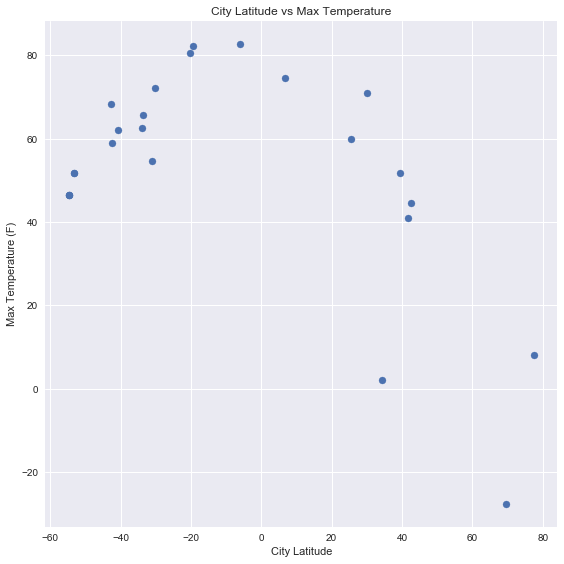

In [33]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(latitudes_df['Latitude'], latitudes_df['Max Temperature'])
plt.title('City Latitude vs Max Temperature')
ax.set_ylabel('Max Temperature (F)')
ax.set_xlabel('City Latitude')
plt.tight_layout()
plt.show()
plt.savefig('Latitude_vs_MaxTemp.png')

### Latitude vs Humidity Plot

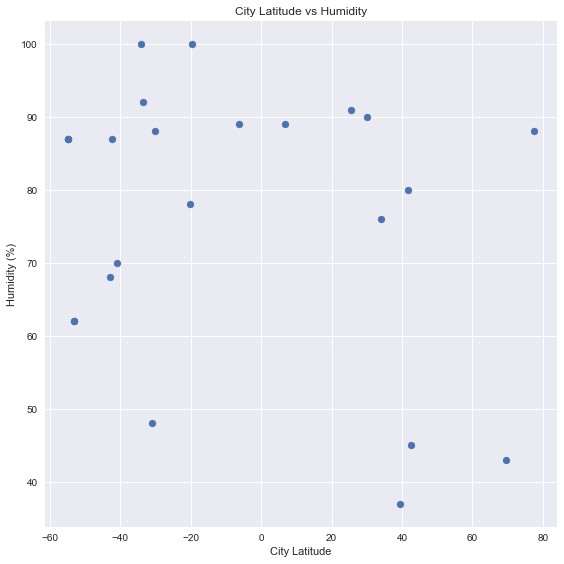

In [34]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(latitudes_df['Latitude'], latitudes_df['Humidity'])
plt.title('City Latitude vs Humidity')
ax.set_ylabel('Humidity (%)')
ax.set_xlabel('City Latitude')
plt.tight_layout()
plt.show()
plt.savefig('Latitude_vs_Humidity.png')

### Latitude vs Cloudiness Plot

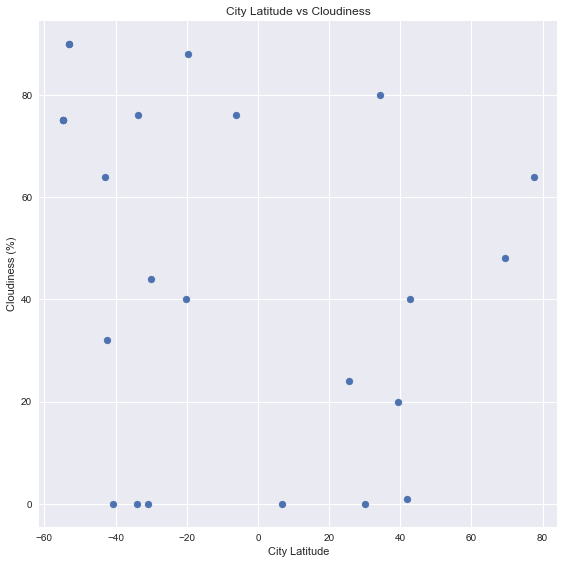

In [35]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(latitudes_df['Latitude'], latitudes_df['Cloudiness'])
plt.title('City Latitude vs Cloudiness')
ax.set_ylabel('Cloudiness (%)')
ax.set_xlabel('City Latitude')
plt.tight_layout()
plt.show()
plt.savefig('Latitude_vs_Cloudiness.png')

### Latitude vs Wind Speed Plot

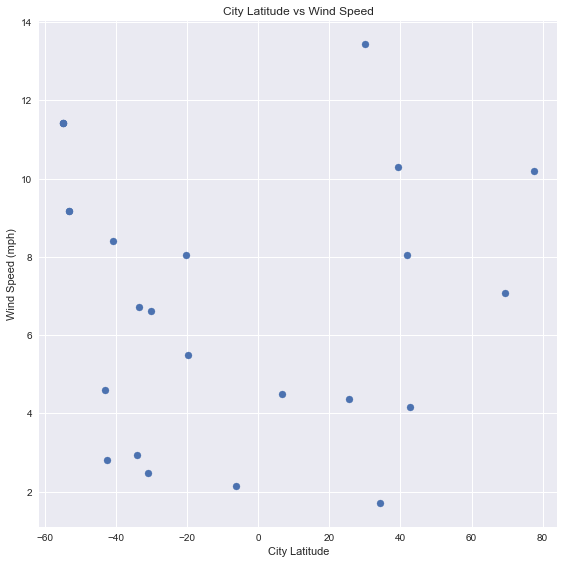

In [36]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(latitudes_df['Latitude'], latitudes_df['Wind Speed'])
plt.title('City Latitude vs Wind Speed')
ax.set_ylabel('Wind Speed (mph)')
ax.set_xlabel('City Latitude')
plt.tight_layout()
plt.show()
plt.savefig('Latitude_vs_WindSpeed.png')